# Творческая работа по Информатике

-------------------------  

### Гитхаб репозиторий: https://github.com/ArtemSmirnovHSE/Jupyter_notebooks_pandas

### Ссылка на датасет: https://www.kaggle.com/alukosayoenoch/cyber-security-breaches-data

### Описание набора данных

Набор данных состоит из распространенных случаев нарушения кибербезопасности в США в период 2007-2014 гг.
Всего в датасете содержится *13 столбцов* (включая столбец с номером) и *1056 строк*. 


Рассмотрим каждую из колонок и дадим краткое описание:

**Number** - порядковый номер случая; <u>непрерывная количественная переменная</u>; принимаемые значения: цифры в порядке возрастания (0,1,2,3...)

**Name_of_Covered_Entity** - название организации, где произошел случай нарушения безопасности; <u>номинальная категориальная переменная</u>;

**State** - аббревиатура штата, где произошел инцидент (расшифровки аббревиатур можно посмотреть [здесь](https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations)); <u>номинальная категориальная переменная</u>;

**Business_Associate_Involved** - вовлеченный деловой партнер; <u>номинальная категориальная переменная</u>

**Individuals_Affected** - число людей, которые были вовлечены в данное событие; <u>непрерывная количественная переменная</u>; пример: 3800, 1000, 5166 и т.д.

**Date_of_Breach** - время нарушения безопасности; <u>дискретная количественная переменная</u>; формат ввода даты: **ММ/ДД/ГГГГ** или **ММ/ДД/ГГГГ**(начало атаки) - **ММ/ДД/ГГГГ** (конец атаки)

**Type_of_Breach** - метод, которым  была получена информация; <u>номинальная категориальная переменная</u>; примеры принимаемых значений: **"Loss"** (потеря техники и т.п.), **"Hacking/IT Incident"** (информация была получена методом хакинга), **"Theft"** (кража техники, например, компьютера с данными) или **"Improper Disposal"** (не до конца утилизированные носители информации были похищены злоумышленниками для извлечения ценных данных)

**Location_of_Breached_Information** - носитель полученной злоумышленниками информации; <u>номинальная категориальная переменная</u>; примеры принимаемых значений:**"Paper"**
(украденная информация содержалась в бумажном виде), **"Laptop"** (информация содержалась на ноутбуке одного из рабочих), **"Network Server"** (похищенные данные были расположены на сервере предприятия)

**Date_Posted_or_Updated** - когда стало известно о нарушении; <u>дискретная количественная переменная</u>

**Summary** - краткое изложение инцидента; <u>номинальная категориальная переменная</u> 

**Breach_start** - дата начала "атаки"; <u>дискретная количественная переменная</u>; формат ввода даты: **ММ/ДД/ГГГГ**

**Breach_end** - дата конца "атаки";<u>дискретная количественная переменная</u>; формат ввода даты: **ММ/ДД/ГГГГ**

**Year** - год, когда случилось правонарушение; <u>дискретная количественная переменная</u>; формат ввода даты: **ГГГГ**


In [58]:
#Импортируем все необходимое
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [59]:

#Формат csv преобразуем в тип переменной DataFrame
data = pd.read_csv('CyberSecurityBreaches.csv')
data
#type(data) --> pandas.core.frame.DataFrame

,Unnamed: 0,Number,Name_of_Covered_Entity,State,Business_Associate_Involved,Individuals_Affected,Date_of_Breach,Type_of_Breach,Location_of_Breached_Information,Date_Posted_or_Updated,Summary,breach_start,breach_end,year
0,1,0,Brooke Army Medical Center,TX,NaN,1000,10/16/2009,Theft,Paper,2014-06-30,A binder containing the protected health infor...,2009-10-16,NaN,2009
1,2,1,"Mid America Kidney Stone Association, LLC",MO,NaN,1000,9/22/2009,Theft,Network Server,2014-05-30,Five desktop computers containing unencrypted ...,2009-09-22,NaN,2009
2,3,2,Alaska Department of Health and Social Services,AK,NaN,501,10/12/2009,Theft,"Other Portable Electronic Device, Other",2014-01-23,NaN,2009-10-12,NaN,2009
3,4,3,Health Services for Children with Special Need...,DC,NaN,3800,10/9/2009,Loss,Laptop,2014-01-23,A laptop was lost by an employee while in tran...,2009-10-09,NaN,2009
4,5,4,"L. Douglas Carlson, M.D.",CA,NaN,5257,9/27/2009,Theft,Desktop Computer,2014-01-23,A shared Computer that was used for backup was...,2009-09-27,NaN,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,1051,1050,Puerto Rico Health Insurance,PR,American Health Inc,28413,9/20/2013,Theft,Other,2014-06-27,NaN,2013-09-20,NaN,2013
1051,1052,1051,"Hospitalists of Brandon, LLC",FL,"Doctors First Choice Billings, Inc.",1831,2/11/2014,Hacking/IT Incident,Other,2014-06-27,NaN,2014-02-11,NaN,2014
1052,1053,1052,Santa Rosa Memorial Hospital,CA,NaN,33702,6/2/2014,"Theft, Loss",Other Portable Electronic Device,2014-06-27,NaN,2014-06-02,NaN,2014
1053,1054,1053,Group Health Plan of Hurley Medical Center,MI,NaN,2289,5/13/2014,Unauthorized Access/Disclosure,E-mail,2014-06-27,NaN,2014-05-13,NaN,2014


In [60]:
#Выведем число пустых значений 
data.isnull().sum()

# Как можно заметить, большое кол-во пустых значений содержится в столбце Business_Associate_Involved, Summary и breach_end

Unnamed: 0                            0
Number                                0
Name_of_Covered_Entity                0
State                                 0
Business_Associate_Involved         784
Individuals_Affected                  0
Date_of_Breach                        0
Type_of_Breach                        0
Location_of_Breached_Information      0
Date_Posted_or_Updated                0
Summary                             913
breach_start                          0
breach_end                          910
year                                  0
dtype: int64

In [61]:
#Заменяем ячейки с отстутсвющими значениями на более удобные для нас переменные

data['Summary'].fillna("No summary", inplace=True)
data['Business_Associate_Involved'].fillna("unknown", inplace=True)#меняем делового партнера на "uknown". 
#Использование mode() здесь неуместно, так как даже если одна компания встречается в датасете множество раз, 
#это не значит, что она фигурировала в других  инцидентах



data['breach_end'].fillna(data['breach_start'], inplace=True) #меняем кол-ую переменную на breach_start.
#Это понадобится нам позже при создании нового столбца



data.head(3)
#Как можно заметить, мы успешно поменяли отсутствующее описание на значение "No summary"

,Unnamed: 0,Number,Name_of_Covered_Entity,State,Business_Associate_Involved,Individuals_Affected,Date_of_Breach,Type_of_Breach,Location_of_Breached_Information,Date_Posted_or_Updated,Summary,breach_start,breach_end,year
0,1,0,Brooke Army Medical Center,TX,unknown,1000,10/16/2009,Theft,Paper,2014-06-30,A binder containing the protected health infor...,2009-10-16,2009-10-16,2009
1,2,1,"Mid America Kidney Stone Association, LLC",MO,unknown,1000,9/22/2009,Theft,Network Server,2014-05-30,Five desktop computers containing unencrypted ...,2009-09-22,2009-09-22,2009
2,3,2,Alaska Department of Health and Social Services,AK,unknown,501,10/12/2009,Theft,"Other Portable Electronic Device, Other",2014-01-23,No summary,2009-10-12,2009-10-12,2009


### Работа с типами данных датасета

In [62]:

#Расммотрим типы переменных с помощью команды
data.dtypes

# Мы получали, что тип данных в колонках  Number, Individuals_Affected и year это int64,
#т.е они являются целыми числами
# Остальные колонки имеют тип object, т.е текстовые или смешанные числовые и нечисловые значения


Unnamed: 0                           int64
Number                               int64
Name_of_Covered_Entity              object
State                               object
Business_Associate_Involved         object
Individuals_Affected                 int64
Date_of_Breach                      object
Type_of_Breach                      object
Location_of_Breached_Information    object
Date_Posted_or_Updated              object
Summary                             object
breach_start                        object
breach_end                          object
year                                 int64
dtype: object

In [63]:
# Очевидно, что колонкам с датами больше подходит тип данных datetime64.
#Давайте тогда изменим их тип:
data["Date_Posted_or_Updated"] = pd.to_datetime(data["Date_Posted_or_Updated"])


#data["Date_of_Breach"] = pd.to_datetime(data["Date_of_Breach"]) --> у нас не получится правильно 
#ковентировать,так как встречаются данные по типу 09/20/2011 - 10/28/2011

data["breach_start"] = pd.to_datetime(data["breach_start"])
data["breach_end"] = pd.to_datetime(data["breach_end"])


data.head()

,Unnamed: 0,Number,Name_of_Covered_Entity,State,Business_Associate_Involved,Individuals_Affected,Date_of_Breach,Type_of_Breach,Location_of_Breached_Information,Date_Posted_or_Updated,Summary,breach_start,breach_end,year
0,1,0,Brooke Army Medical Center,TX,unknown,1000,10/16/2009,Theft,Paper,2014-06-30,A binder containing the protected health infor...,2009-10-16,2009-10-16,2009
1,2,1,"Mid America Kidney Stone Association, LLC",MO,unknown,1000,9/22/2009,Theft,Network Server,2014-05-30,Five desktop computers containing unencrypted ...,2009-09-22,2009-09-22,2009
2,3,2,Alaska Department of Health and Social Services,AK,unknown,501,10/12/2009,Theft,"Other Portable Electronic Device, Other",2014-01-23,No summary,2009-10-12,2009-10-12,2009
3,4,3,Health Services for Children with Special Need...,DC,unknown,3800,10/9/2009,Loss,Laptop,2014-01-23,A laptop was lost by an employee while in tran...,2009-10-09,2009-10-09,2009
4,5,4,"L. Douglas Carlson, M.D.",CA,unknown,5257,9/27/2009,Theft,Desktop Computer,2014-01-23,A shared Computer that was used for backup was...,2009-09-27,2009-09-27,2009


In [64]:
#Работа с категориальными переменными. Обозначим все категориальные переменные. Тем самым мы изменим их тип с object на category

data['State'] = pd.Categorical(data['State'])
data['Name_of_Covered_Entity'] = pd.Categorical(data['Name_of_Covered_Entity'])
data['Business_Associate_Involved'] = pd.Categorical(data['Business_Associate_Involved'])
data['Business_Associate_Involved'] = pd.Categorical(data['Business_Associate_Involved'])
data['Type_of_Breach'] = pd.Categorical(data['Type_of_Breach'])
data['Location_of_Breached_Information'] = pd.Categorical(data['Location_of_Breached_Information'])
data['Summary'] = pd.Categorical(data['Summary'])


#Это совершенно не обязательно, но зато это удобно при анализе данных и при прочих манипуляциях

# data['State'].cat.categories --> ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI',
#        'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN',
#        'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH',
#        'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT',
#        'WA', 'WI', 'WV', 'WY'] Это все штаты, что фигурируют в столбце states
#data['year'].dt.day 

data = data[data['year']>1997] #избавляемся от двух-трех строк, в которых данные слишком выбиваются из списка
# выбивающиеся значения будут нам очень мешать при построении графика
#data[130:145] для проверки, что все прошло хорошо, и мы избавились от "плохого" значения



In [65]:
# Проверим результат наших изменений: 
data.dtypes
# Видим, что мы успешно изменили тип данных object на datetime64, где это было применимо

Unnamed: 0                                   int64
Number                                       int64
Name_of_Covered_Entity                    category
State                                     category
Business_Associate_Involved               category
Individuals_Affected                         int64
Date_of_Breach                              object
Type_of_Breach                            category
Location_of_Breached_Information          category
Date_Posted_or_Updated              datetime64[ns]
Summary                                   category
breach_start                        datetime64[ns]
breach_end                          datetime64[ns]
year                                         int64
dtype: object

In [67]:
#Теперь наши столбцы breach_start и breach_end имеют тип datetime64.
#Мы можем воспользоваться этим, чтобы создать столбец Breach_duration, где мы подсчитаем разницу между двумя значениям в днях. Breach_duration покажет нам, сколько времени потребовалось злоумышленникам, чтобы заполучить данные. Единица измерения в столбце -  дни. Тип переменной: непрерывная количественная переменная

data['Breach_duration'] = data['breach_end'] - data['breach_start']
#data['Breach_duration'] = pd.to_datetime(data['Breach_duration'])
data.head(1)
# Успешно создали новый столбец. Мы молодцы! 

data.dtypes


C:\Users\Anna Smirnova\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Unnamed: 0                                    int64
Number                                        int64
Name_of_Covered_Entity                     category
State                                      category
Business_Associate_Involved                category
Individuals_Affected                          int64
Date_of_Breach                               object
Type_of_Breach                             category
Location_of_Breached_Information           category
Date_Posted_or_Updated               datetime64[ns]
Summary                                    category
breach_start                         datetime64[ns]
breach_end                           datetime64[ns]
year                                          int64
Breach_duration                     timedelta64[ns]
dtype: object

In [68]:
#Создадим еще один столбец типа bool
data['Any_business_Associate_Involved'] = data['Business_Associate_Involved']!="unknown" 
data.head(1)
#Теперь данный столбец понадобится нам пр построении таблиц

C:\Users\Anna Smirnova\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Unnamed: 0,Number,Name_of_Covered_Entity,State,Business_Associate_Involved,Individuals_Affected,Date_of_Breach,Type_of_Breach,Location_of_Breached_Information,Date_Posted_or_Updated,Summary,breach_start,breach_end,year,Breach_duration,Any_business_Associate_Involved
0,1,0,Brooke Army Medical Center,TX,unknown,1000,10/16/2009,Theft,Paper,2014-06-30,A binder containing the protected health infor...,2009-10-16,2009-10-16,2009,0 days,False


In [69]:
data.dtypes

Unnamed: 0                                    int64
Number                                        int64
Name_of_Covered_Entity                     category
State                                      category
Business_Associate_Involved                category
Individuals_Affected                          int64
Date_of_Breach                               object
Type_of_Breach                             category
Location_of_Breached_Information           category
Date_Posted_or_Updated               datetime64[ns]
Summary                                    category
breach_start                         datetime64[ns]
breach_end                           datetime64[ns]
year                                          int64
Breach_duration                     timedelta64[ns]
Any_business_Associate_Involved                bool
dtype: object

### Проводим многоуровневую сортировку таблицы

In [70]:
data.sort_values(by=["Individuals_Affected", "breach_start" ], ascending=False).head(20)
#Сначала сортировка проводится по числу людей 'Individuals_Affected', 
#а затем по дате инцидента 'breach_start'
#Сортировка по убыванию

,Unnamed: 0,Number,Name_of_Covered_Entity,State,Business_Associate_Involved,Individuals_Affected,Date_of_Breach,Type_of_Breach,Location_of_Breached_Information,Date_Posted_or_Updated,Summary,breach_start,breach_end,year,Breach_duration,Any_business_Associate_Involved
409,410,409,TRICARE Management Activity (TMA),VA,Science Applications International Corporation...,4900000,9/13/2011,Loss,Other,2014-01-23,No summary,2011-09-13,2011-09-13,2011,0 days,True
799,800,799,"Advocate Health and Hospitals Corporation, d/b...",IL,unknown,4029530,7/15/2013,Theft,Desktop Computer,2014-01-23,No summary,2013-07-15,2013-07-15,2013,0 days,False
270,271,270,"Health Net, Inc.",CA,IBM,1900000,1/21/2011,Unknown,Other,2014-01-23,No summary,2011-01-21,2011-01-21,2011,0 days,True
242,243,242,New York City Health & Hospitals Corporation's...,NY,GRM Information Management Services,1700000,12/23/2010,Theft,"Other, Electronic Medical Record",2014-05-28,Unencrypted clinical system backup tapes that ...,2010-12-23,2010-12-23,2010,0 days,True
92,93,92,"AvMed, Inc.",FL,unknown,1220000,12/10/2009,Theft,Laptop,2014-06-30,Two laptop computers with questionable encrypt...,2009-12-10,2009-12-10,2009,0 days,False
382,383,382,The Nemours Foundation,FL,unknown,1055489,8/10/2011,Loss,Other,2014-01-23,No summary,2011-08-10,2011-08-10,2011,0 days,False
185,186,185,"BlueCross BlueShield of Tennessee, Inc.",TN,unknown,1023209,10/2/2009,Theft,Other,2014-01-23,No summary,2009-10-02,2009-10-02,2009,0 days,False
413,414,413,Sutter Medical Foundation,AL,unknown,943434,10/15/2011,Theft,Desktop Computer,2014-01-23,No summary,2011-10-15,2011-10-15,2011,0 days,False
910,911,910,"Horizon Healthcare Services, Inc., doing busin...",NJ,unknown,839711,11/1/2013,Theft,Laptop,2014-02-21,No summary,2013-11-01,2013-11-01,2013,0 days,False
117,118,117,South Shore Hospital,MA,"Iron Mountain Data Products, Inc. (now known as",800000,2/26/2010,Loss,"Other Portable Electronic Device, Other, Elect...",2014-01-23,No summary,2010-02-26,2010-02-26,2010,0 days,True


### По имеющимся данным построим несколько графиков для удобного отображения информации:

In [71]:
%matplotlib inline #для построения графиков

UsageError: unrecognized arguments: #для построения графиков


#### График 1

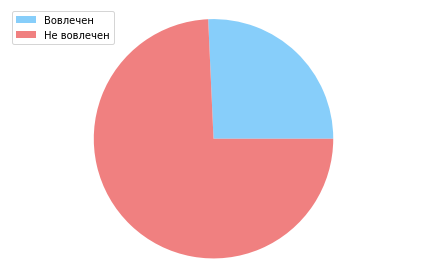

In [72]:
#Рассмотрим, как часто сторонний бизнес пострадал от крупных информационных преступлений
involved = np.sum(data['Any_business_Associate_Involved'] == True) 
uninvolved = np.sum(data['Any_business_Associate_Involved'] == False)

#Для этого мы записали две переменные, которые считают общее чилсло раз, 
#когда известен или неизвестен другой бизнес, фигурировавший в деле


#uninvolved# --> 783
#involved #--> 271


val_list = [involved, uninvolved] #этот список будет использован для построения графика
labels = 'Вовлечен', 'Не вовлечен' #наша легенда
colors = ['lightskyblue', 'lightcoral' ]#назначаем цвета
fig, ax = plt.pie(val_list, colors=colors,
        shadow=False)
plt.legend(fig, labels, loc="best")
plt.axis('equal', title='Был ли в инцидент вовлечен деловой партнер')#у меня возникли проблемы
#с добавлением названия. Пробовал разными способами, но не получилось
#plt.title = "!!!!!"


plt.tight_layout()





Данный график может вести к двум диаметрально противоположным выводам: 
1. Крупные компании и их союзы часто обладают надежной защитой, что уменьшает их шансы стать новой целью киберпреступников 
2. Крупные компании часто не хотят числится в списках компаний, которые имеют несовершенную защиту, так как это потенциально становится репутационном риском - на самом деле пострадавших бизнесов гораздо больше, но они не числятся в статистике.

In [73]:
###Это совершенно не обязательно, но я решил попробовать генерировать рандомные цвета для графика
import random
def ran_col():
    return round(random.uniform(0, 1), 1)

#### График 2

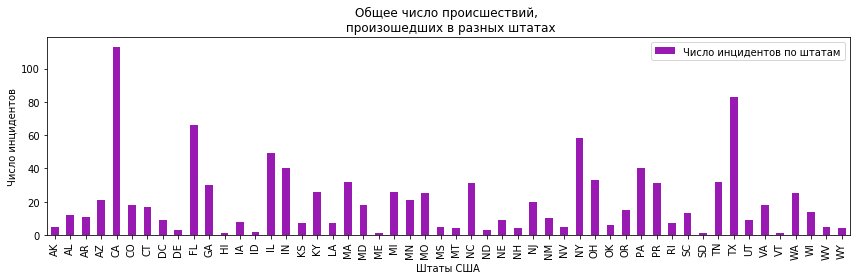

In [74]:
graph = data.groupby('State')['Individuals_Affected'].size().plot(kind='bar', 
                                                          title='Общее число происшествий, \n произошедших в разных штатах', 
                                                          figsize=(12,4), 
                                                          color=(
                                                              ran_col(),ran_col(),ran_col())
                                                         )

graph.legend(['Число инцидентов по штатам'])
graph.set_ylabel("Число инцидентов")
graph.set_xlabel("Штаты США")

plt.tight_layout()


#### График 3

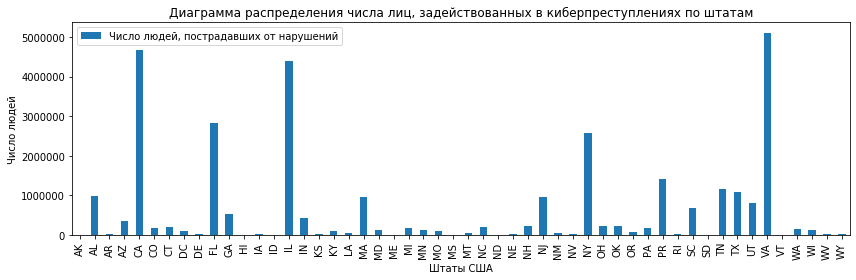

In [75]:
graph = data.groupby('State')['Individuals_Affected'].sum().plot(kind='bar', title='Диаграмма распределения числа лиц, \
задействованных в киберпреступлениях по штатам', figsize=(12,4))


graph.legend(['Число людей, пострадавших от нарушений'])
graph.set_ylabel("Число людей")
graph.set_xlabel("Штаты США")

plt.tight_layout()



В данном графике мы рассматриваем кол-во пострадавших от киберпреступлений сотрудников и клиентов. Хотя соотношения в основном совпадают с графиком 2, можно заметить некоторые интересные несовпадения. Например, несмотря на то, что в штате Виргиния **(VA)** произошло сравнительно небольшое число инцидентов, людей, которые понесли ущерб из-за нарушений кибербезопасности, невероятно много. Это может объяснятся неправильным сбором статиски, ошибкой в построении графика или единичной крупной атакой, произошедшей в Виржинии. Подобную ситуацию можно наблюдать у штата Иллинойс **(IL)**

#### График 4

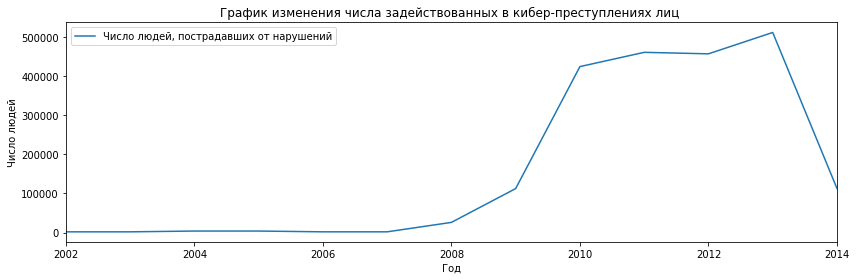

In [76]:
#data.groupby('year')['Individuals_Affected', 'year'].sum() --> выдает общее число пострадавших
# за определенный год

graph  = data.groupby('year')['year'].sum().plot(kind='line', title='График изменения числа \
задействованных в кибер-преступлениях лиц ', figsize=(12,4))

graph.legend(['Число людей, пострадавших от нарушений'])
graph.set_ylabel("Число людей")
graph.set_xlabel("Год")

plt.tight_layout()

График наглядно демонстрирует пик киберпреступлений в период с 2012 по 2014. Однако парадоксален спад кол-ва кибератак в 2014. Предполагаю, что это связано не достаточным сбором необходимых данных

#### График 5

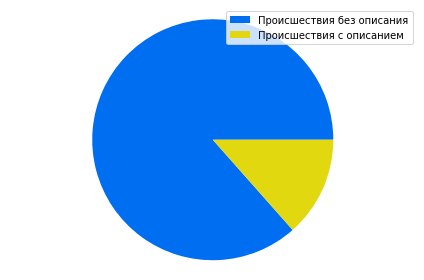

In [77]:
nosummary = np.sum(data['Summary'] == 'No summary') #Число происшествий, где описание 
#не было дано создателем датасета (изначально было значение null) и было заменено нами на строку 'No summary'
 

summary = np.sum(data['Summary'] != 'No summary')#число происшествий, где автор добавил описание
val_list = [nosummary, summary]
labels = 'Происшествия без описания', 'Происшествия с описанием' #значения для легенды 
colors = ['#006ef1', '#e2d810'] #цвета для круговой диаграммы
fig, ax = plt.pie(val_list, colors=colors,
        shadow=False)
plt.legend(fig, labels)
plt.axis('equal', title='Соотношение происшествий с подродным описанием и без него')


plt.tight_layout()#добавили для того, чтобы график помещался в нашу область 
#и не видеть числовые значения




 В графике 5 наблюдается такая же тенденция, что и в первом графике - крайне необходимая информация не была записана в датасет Я склонен верить, что отсутствие подробного описания свидетельствует о нежелании многих компаний разглашать какую-либо информацию о своих неудачах и просчетах персонала. 

### По имеющимся данным построим несколько сводных таблиц:

#### Таблица 1

In [78]:
df_pivot = pd.pivot_table(data,
               index=["State"], values=["Individuals_Affected"], aggfunc=[np.sum]  ).head()
#kostil был создан нами для того, чтобы сортировать сводную таблицу не только по индеку 'State',
#но  

df_pivot.reindex(df_pivot['sum'].sort_values(by='Individuals_Affected', ascending=False).index)


#Теперь мы можем рассмотреть список числа пострадавших по штатам, отсортированный по штатам

,sum
,Individuals_Affected
State,
CA,4672091
AL,980780
AZ,366030
AR,33546
AK,8500


Представленная сводная таблица наглядно показывает нам, сколько людей было задействовано в киберпреступлениях в каждом штате. Для дальнейших исследований это очень важно: данная информация может использоваться для выявления степени защищенности информационных систем каждого штата или степени "популярности" штата среди киберпреступников.
В штаты с наибольшим числом пострадавших входят:

**Калифорния** (CA)	
**Алабама** (AL)	
**Аризона** (AZ)	
**Арканзас** (AR)	
**Аляска** (AK)	



#### Таблица 2

In [79]:
#data['Business_Associate_Involved'].mode()
kostil2 = pd.pivot_table(data,
    index=["Type_of_Breach", "State"], values=["Individuals_Affected"], aggfunc=[np.sum, len])

kostil2.reindex(kostil2['len'].sort_values(by='Individuals_Affected', ascending=False).index)
#Сортируем по кол-ву инцидентов
#Теперь нам видна группировка не только по штатам, но и по типам. 
#Также с помощью len мы узнали, сколько раз был случай нарушения безопасности в данной категории


sum                  len
                     Individuals_Affected Individuals_Affected
Type_of_Breach State                                          
Theft          CA                 2244587                   65
               TX                  181924                   42
               NY                 2347761                   39
               FL                 1569922                   29
               PR                  650555                   22
...                                   ...                  ...
Theft, Loss    LA                   17000                    1
Loss           ID                    5500                    1
Theft, Loss    FL                    1137                    1
               CA                   33702                    1
Unknown, Other RI                    2082                    1

[274 rows x 2 columns]

Результат получился весьма неожиданным. Вопреки расхожему мнению, самыми частыми причинами нарушения кибербезопасности являются не кибератаки, а обычное воровство, например, компьютера или телефона одного из сотрудников

#### Таблица 3

In [80]:
#Считаем общее число пострадавших в каждом году с разбивкой по штатам с использованием столбцов
#Отсутствующие значения мы заменили на ноль

pd.pivot_table(data,
    index=["year"], columns=["State"], values=["Individuals_Affected"], 
               aggfunc=[np.sum], fill_value=0).sort_values('year', ascending=False)
#На этот раз сортируем не по числу людей, а по годам, чтобы с помощью head() 
#мы могли вывести наиболее актуальную информацию из доступных в данном датасете





sum                                                 \
      Individuals_Affected                                                  
State                   AK      AL     AR      AZ       CA      CO     CT   
year                                                                        
2014                     0       0      0   55207   462593   12286   4341   
2013                  1556    7202   4411    6962   942186   26555    858   
2012                     0    4055  23547   51206   552769    6262  31645   
2011                  4443  965058   4588  240032  2479284    6789  94425   
2010                  2000    4465   1000   10957   170192  111165  78221   
2009                   501       0      0    1100    65067    2500      0   
2008                     0       0      0       0        0       0      0   
2007                     0       0      0       0        0       0      0   
2006                     0       0      0       0        0       0      0   
2005                     0       0      0       0        0       0      0   
2004                     0       0      0     566        0       0      0   
2003                     0       0      0       0        0       0      0   
2002                     0       0      0       0        0       0      0   

                              ...                                          \
                              ...                                           
State     DC     DE       FL  ...    SD       TN      TX      UT       VA   
year                          ...                                           
2014       0      0     2417  ...     0        0   26978    9800     5534   
2013       0   1883    71597  ...     0    64283  741253   11132    45003   
2012   66601      0   113381  ...  8500    32289   76627  780000   142210   
2011    3075    948  1209947  ...     0     8269   36102       0  4902144   
2010    3612  22642   199341  ...     0    22682   95896    1298    15890   
2009   22200      0  1242519  ...     0  1041709   34130    5700        0   
2008       0      0     1562  ...     0        0    2875       0        0   
2007       0      0        0  ...     0        0       0       0        0   
2006       0      0        0  ...     0        0       0       0        0   
2005       0      0        0  ...     0        0   65000       0        0   
2004       0      0        0  ...     0        0       0       0        0   
2003       0      0        0  ...     0        0       0       0        0   
2002       0      0        0  ...     0        0       0       0        0   

                                        
                                        
State   VT     WA     WI     WV     WY  
year                                    
2014     0   8300      0      0      0  
2013   550  82631  55726      0  14635  
2012     0   5395  50441   2905      0  
2011     0  28596   3675  17168  15000  
2010     0  33030  13973   1470      0  
2009     0      0      0      0   9023  
2008     0      0      0      0      0  
2007     0      0      0      0      0  
2006     0      0      0      0      0  
2005     0      0      0      0      0  
2004     0      0      0      0      0  
2003     0      0      0      0      0  
2002     0      0      0      0      0  

[13 rows x 52 columns]

Построенная сводная таблица позволяет нам рассмотреть влияние нарушений кибербезопасности на жителей различных штатов, а также довольно наглядно показывает нам частоту нарушений по различным годам. Как мы заметили ранее, пик нарушения кибербезопасности приходится на период с 2012 по 2014 года. 

## Выводы:
Информационная безопасность до сих пор остается одним из важнейших аспектом не только в IT-сфере, но и в других профессиональных областях. Данный датасет показывает не только невероятно огромные масштабы кибератак и последствия, которые они за собой влекут, но и нехватку данных в данной области.

В новостях мы, к сожалению, слышим только о чрезвычайно крупных нарушениях в области кибербезопасности, которые ведут к раскрытию миллионов данных людей. Но мало кто задумывается, что такие крупные утечки являются плодом менее значительных преступлений, вызванных не только корыстными намерениями хакеров, но и халатностью  разработчиков программ, системных администраторов и обычного персонала. Просчеты небольшой группы людей могут вести к безработице тысяч людей, множеству украденных мошенниками денег и т.д.

Проблемы с безопасным хранением и использованием конфиденциальных  данных не должны умалчиваться, гораздо больше компаний должны публиковать описания произошедших с ними кибератак (особенно учитывая статистку - обратите внимание на график 5). Только общей осведомленностью и трепетным отношением к личным данным мы сможем обезопасить себя и сделать работу нарушителей в разы сложнее. 